In [68]:
#numpyのインストール
import numpy as np
#pandasのインストール
import pandas as pd
#statistics
import statistics as st
#statsmodelsのインストール
import statsmodels.api as sm
#時系列モデルのインストール
from statsmodels.tsa import stattools as st
from statsmodels.tsa.seasonal import seasonal_decompose as sd
#scikit-learnのインストール
import sklearn.linear_model as lm
#msnoのインストール
import missingno as msno
#pyplotのインストール
import matplotlib.pyplot as plt
#seabornのインストール
import seaborn as sns
%matplotlib inline
sns.set()
lr = lm.LogisticRegression()

In [69]:
df = pd.read_csv('data3.csv')
df.shape
#195×19次元

(183, 19)

In [70]:
df.head(10)

,year,avg_temp,avg_temp1,avg_temp2,sun,sun1,sun2,sun3,avg_wind,avg_wind1,avg_wind2,avg_cloud_quantity,avg_cloud_quantity1,avg_cloud_quantity2,rain_sum,rain_sum1,rain_sum2,rain_sum3,Year
0,2001/1/1,4.6,8,1,173.9,0,8,1,4.1,8,1,5.0,8,1,146.5,0,8,1,NaN
1,2001/2/1,6.2,8,1,146.9,0,8,1,3.6,8,1,6.1,8,1,38.5,0,8,1,NaN
2,2001/3/1,9.4,8,1,181.3,0,8,1,4.1,8,1,5.9,8,1,133.5,0,8,1,NaN
3,2001/4/1,15.0,8,1,226.6,0,8,1,3.9,8,1,5.6,8,1,64.0,0,8,1,NaN
4,2001/5/1,18.7,8,1,170.0,0,8,1,3.5,8,1,7.6,8,1,194.5,0,8,1,NaN
5,2001/6/1,22.2,8,1,114.5,0,8,1,3.0,8,1,8.8,8,1,141.0,0,8,1,NaN
6,2001/7/1,27.4,8,1,275.5,0,8,1,3.9,8,1,5.9,8,1,46.5,0,8,1,NaN
7,2001/8/1,25.8,8,1,132.8,0,8,1,2.8,8,1,8.4,8,1,162.5,0,8,1,NaN
8,2001/9/1,22.6,8,1,119.0,0,8,1,3.2,8,1,7.6,8,1,215.5,0,8,1,NaN
9,2001/10/1,18.1,8,1,149.4,0,8,1,3.3,8,1,6.4,8,1,306.5,0,8,1,NaN


In [74]:
#原系列
w_data = df.loc[:,['year','avg_temp','sun','avg_wind','rain_sum','avg_cloud_quantity']].set_index('year')

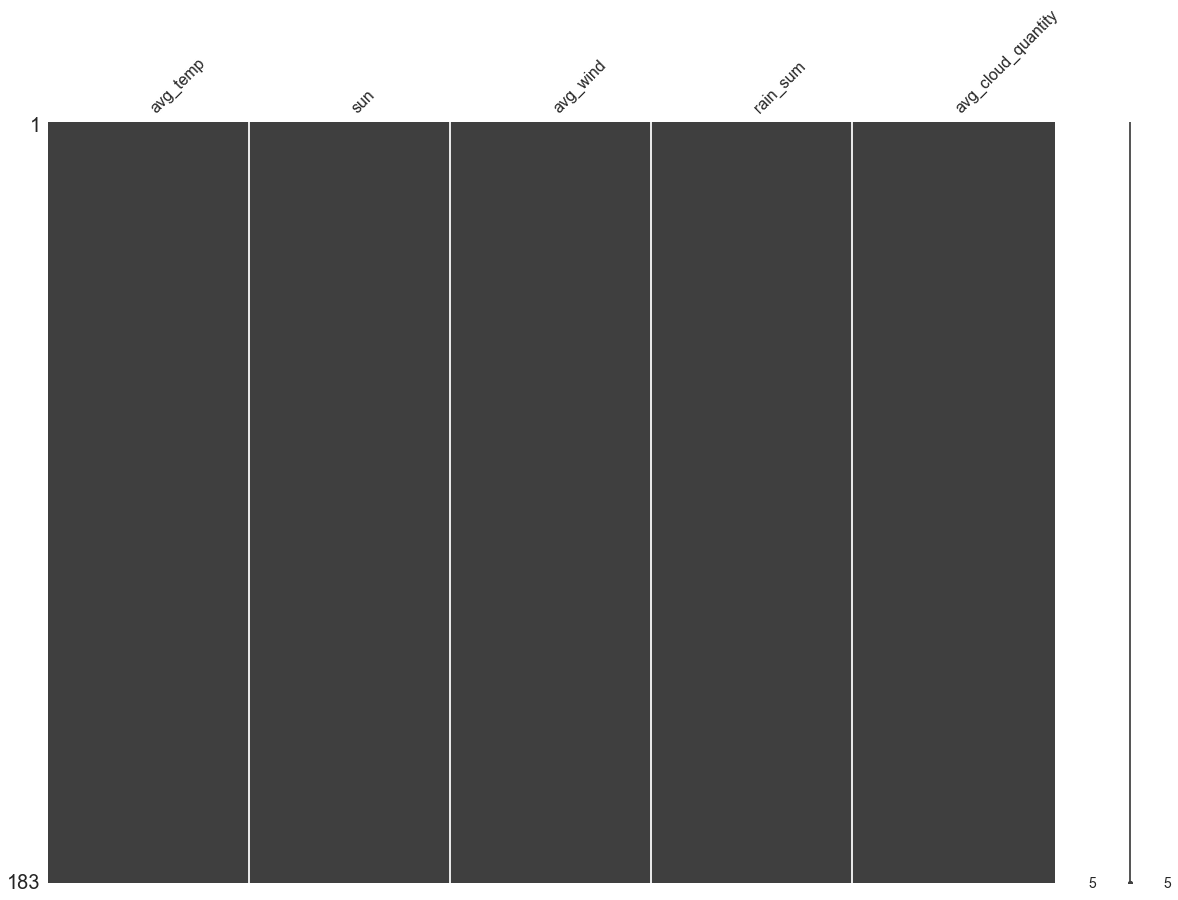

In [75]:
#データ欠損の確認 (欠損なし！)
msno.matrix(df=w_data,figsize=(20,14))

In [76]:
#原系列に対するADF検定
print (st.adfuller(w_data['avg_temp'].values.ravel()))
print (st.adfuller(w_data['sun'].values.ravel()))
print (st.adfuller(w_data['avg_wind'].values.ravel()))
print (st.adfuller(w_data['rain_sum'].values.ravel()))
print (st.adfuller(w_data['avg_cloud_quantity'].values.ravel()))

(-3.0735916943566344, 0.028570257964309134, 13, 169, {'1%': -3.4696482639876569, '5%': -2.8787989063084951, '10%': -2.5759713094779593}, 534.12008400846628)
(-5.2513985918225723, 6.8985898729093187e-06, 5, 177, {'1%': -3.4678453197999071, '5%': -2.8780117454974392, '10%': -2.575551186759871}, 1712.5427137768888)
(-1.8484999334505661, 0.3566622868963647, 13, 169, {'1%': -3.4696482639876569, '5%': -2.8787989063084951, '10%': -2.5759713094779593}, 126.90509974133818)
(-7.7312180161651618, 1.1240642266026284e-11, 9, 173, {'1%': -3.4687256239864017, '5%': -2.8783961376954363, '10%': -2.5757563410070499}, 2025.9494995038413)
(-2.8809550966213782, 0.047607906346807269, 12, 170, {'1%': -3.4694134689599019, '5%': -2.8786964197028295, '10%': -2.5759166089965397}, 470.8925248952072)


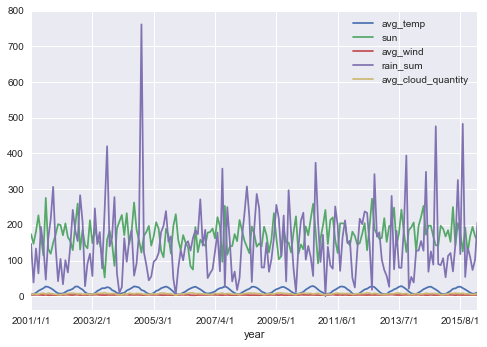

In [77]:
#原系列のplot
w_data.plot()

In [52]:
w_data.head()

,avg_temp,sun,avg_wind,rain_sum,avg_cloud_quantity
year,,,,,
2001/1/1,4.6,173.9,4.1,146.5,5.0
2001/2/1,6.2,146.9,3.6,38.5,6.1
2001/3/1,9.4,181.3,4.1,133.5,5.9
2001/4/1,15.0,226.6,3.9,64.0,5.6
2001/5/1,18.7,170.0,3.5,194.5,7.6


In [62]:
##各移動平均と差分系列を取得
#気温
temp_data = w_data.loc[:,['avg_temp']]
temp_moving_avg = temp_data.rolling(window=12).mean().fillna(w_data['avg_temp'].median())
temp_diff = temp_data.diff()
#日差し
sun_data = w_data.loc[:,['sun']]
sun_moving_avg = sun_data.rolling(window=12).mean()
sun_diff = sun_data.diff()
#風量
wind_data = w_data.loc[:,['avg_wind']]
wind_moving_avg = wind_data.rolling(window=12).mean()
wind_diff = wind_data.diff()
#雨量
rain_data = w_data.loc[:,['rain_sum']]
rain_moving_avg = rain_data.rolling(window=12).mean()
rain_diff = rain_data.diff()
#雲量
cloud_data = w_data.loc[:,['avg_cloud_quantity']]
cloud_moving_avg = cloud_data.rolling(window=12).mean()
cloud_diff = cloud_data.diff()

In [63]:
temp_diff.head()

,avg_temp
year,
2001/1/1,15.6
2001/2/1,1.6
2001/3/1,3.2
2001/4/1,5.6
2001/5/1,3.7


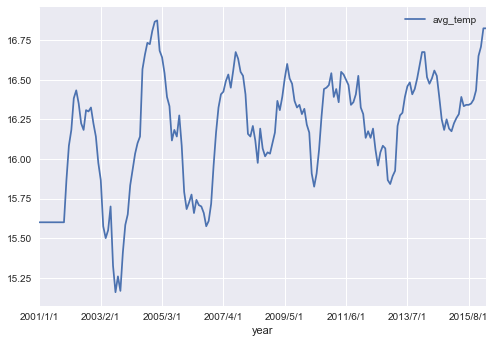

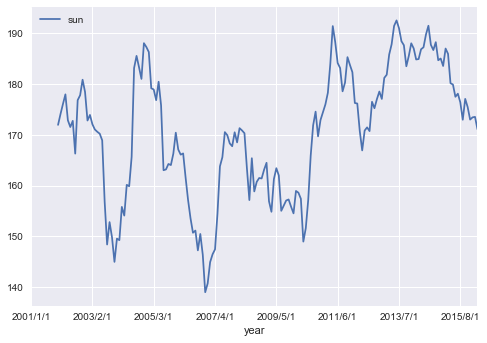

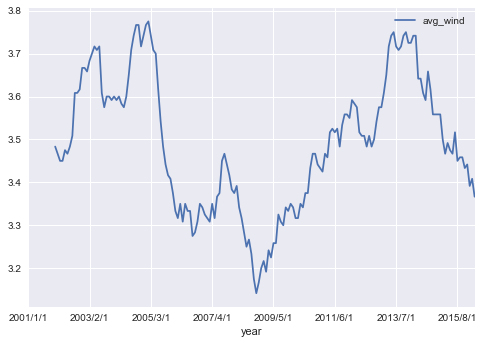

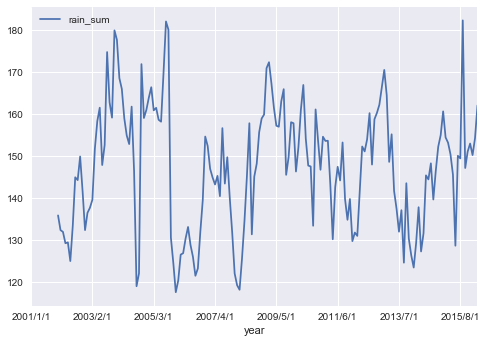

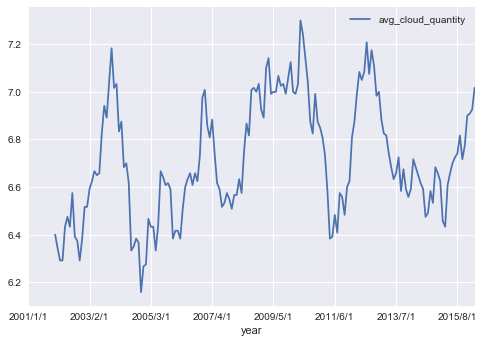

In [87]:
temp_moving_avg.plot()
sun_moving_avg.plot()
wind_moving_avg.plot()
rain_moving_avg.plot()
cloud_moving_avg.plot()

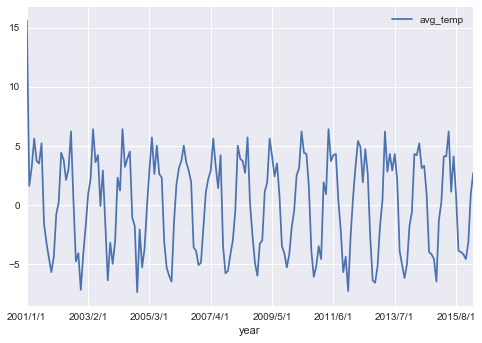

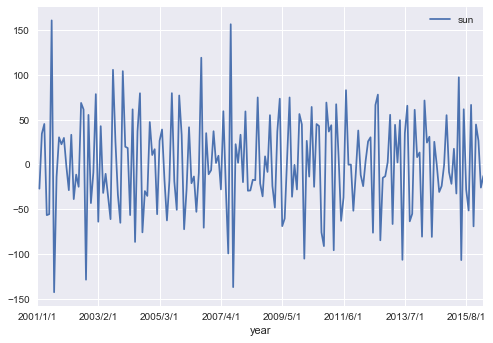

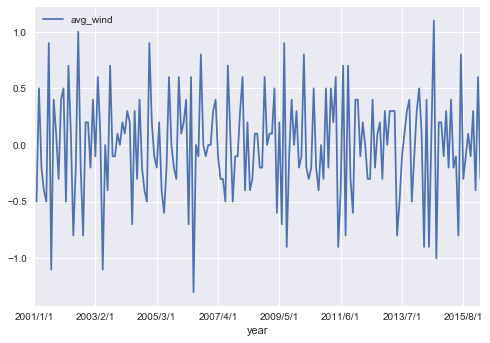

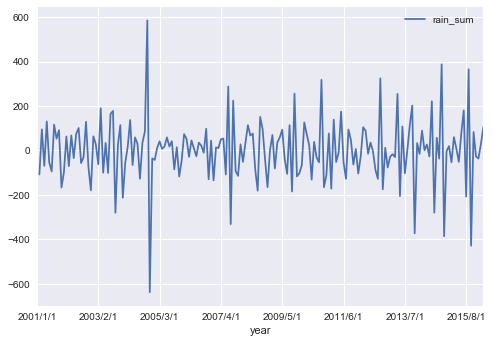

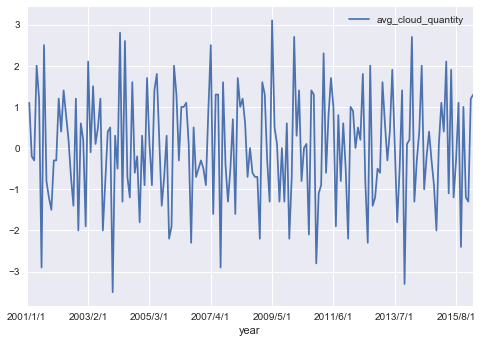

In [88]:
#差分系列のplot
temp_diff.plot()
sun_diff.plot()
wind_diff.plot()
rain_diff.plot()
cloud_diff.plot()

## 差分系列が定常過程かつ、単位根検定が

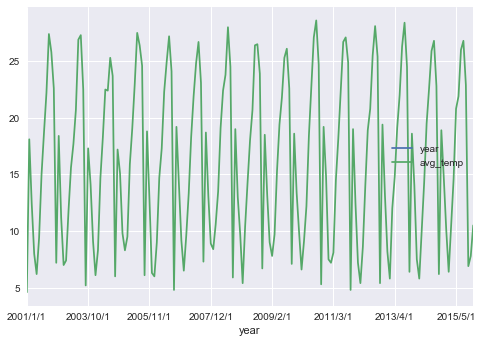

In [22]:
temp_data = w_data.loc[:,['year','avg_temp']]
temp_data.plot()

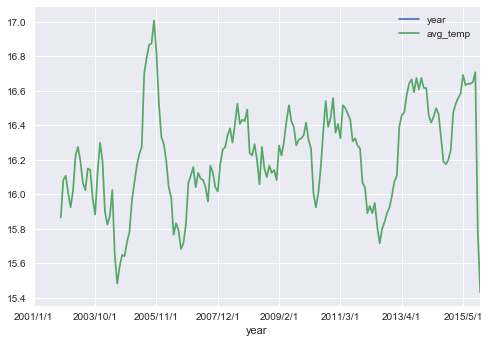

In [23]:
temp_moving_avg = temp_data.rolling(window=12).mean()
temp_moving_avg.set_index(['year'])
temp_moving_avg.plot()

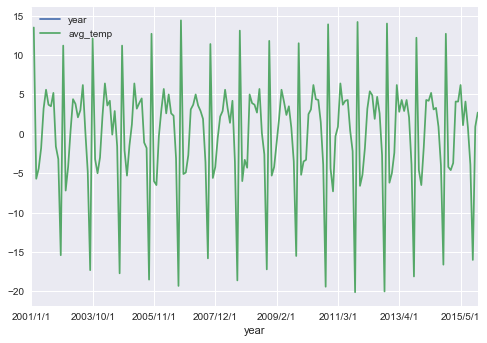

In [24]:
temp_data.diff().plot()

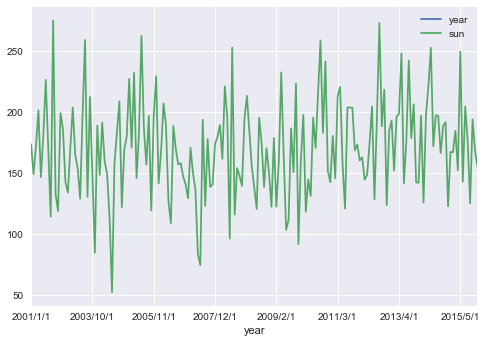

In [11]:
sun_data = m_data.loc[:,['year','sun']]
sun_data.plot()

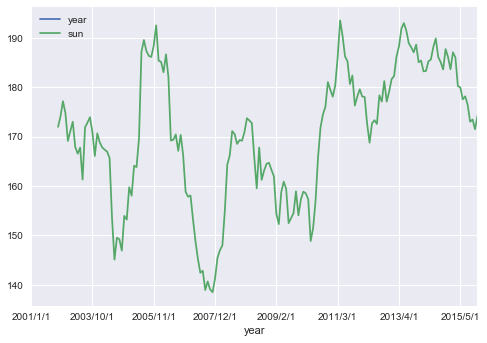

In [12]:
#移動平均をとった
sun_moving_avg = sun_data.rolling(window=12).mean()
sun_moving_avg.set_index(['year'])
sun_moving_avg.plot()

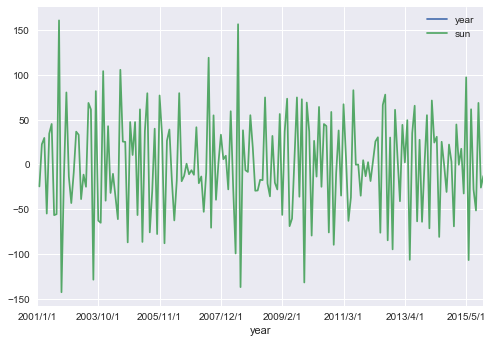

In [14]:
sun_diff = sun_data.diff()
sun_diff.plot()

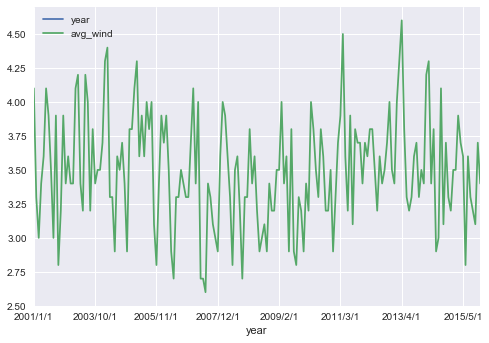

In [15]:
wind_data = m_data.loc[:,['year','avg_wind']]
wind_data.plot()

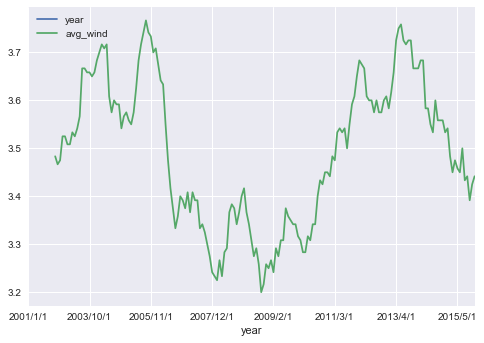

In [16]:
wind_moving_avg = wind_data.rolling(window=12).mean()
wind_moving_avg.plot()

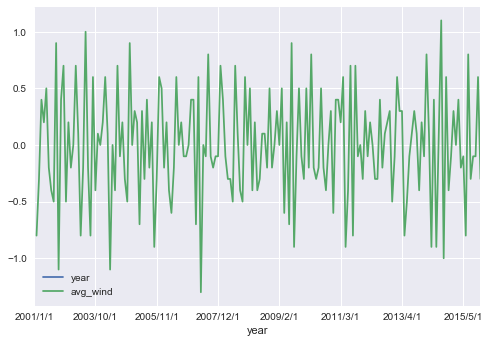

In [17]:
wind_diff = wind_data.diff()
wind_diff.plot()

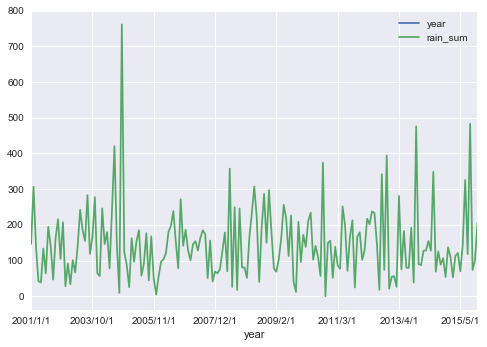

In [18]:
rain_data = m_data.loc[:,['year','rain_sum']]
rain_data.plot()

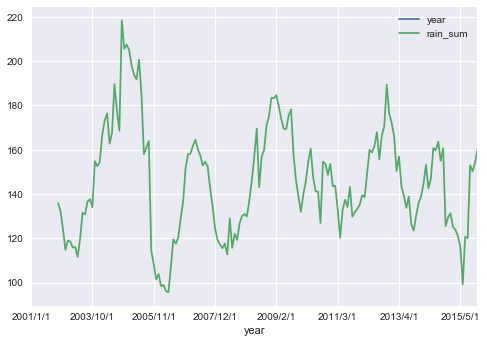

In [19]:
rain_moving_avg = rain_data.rolling(window=12).mean()
rain_moving_avg.plot()

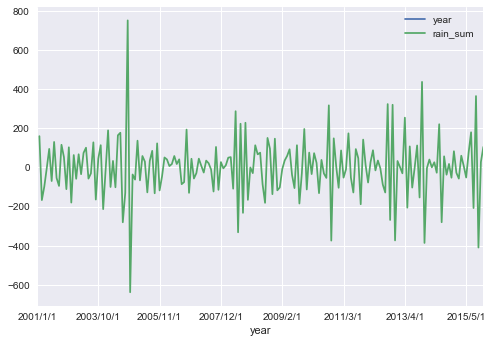

In [20]:
rain_diff = rain_data.diff()
rain_diff.plot()

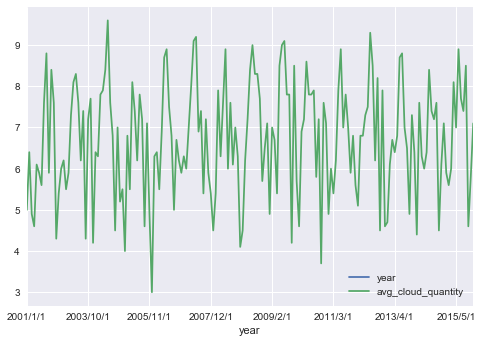

In [21]:
cloud_data = m_data.loc[:,['year','avg_cloud_quantity']]
cloud_data.plot()

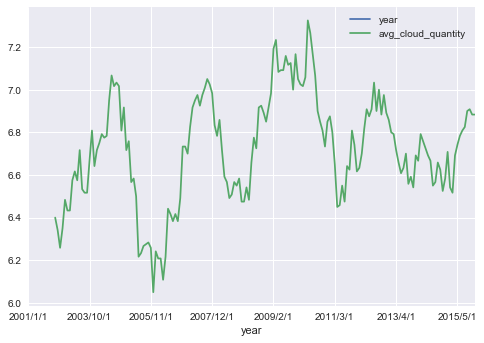

In [22]:
cloud_moving_avg = cloud_data.rolling(window=12).mean()
cloud_moving_avg.plot()

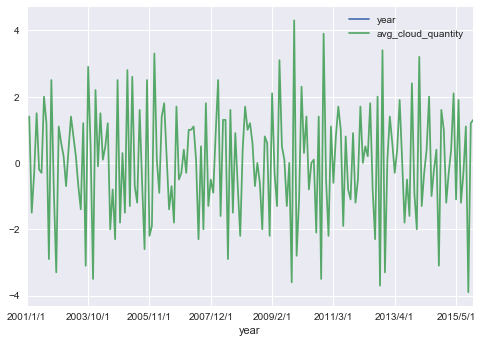

In [24]:
cloud_diff = cloud_data.diff()
cloud_diff.plot()

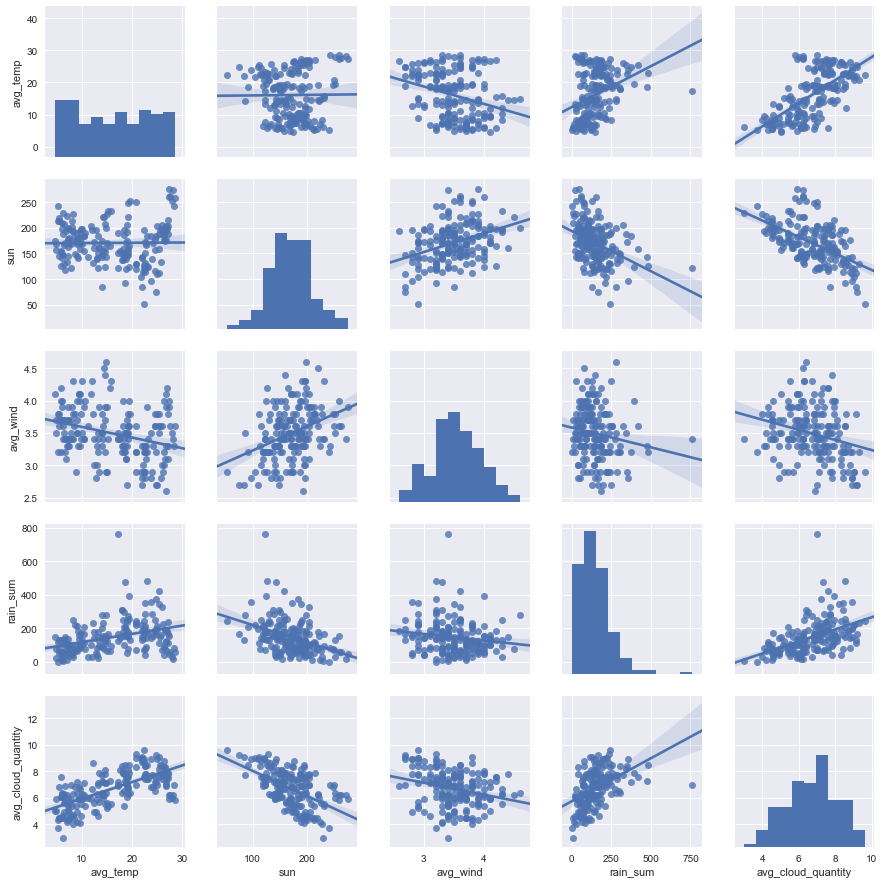

In [25]:
sns.pairplot(m_data,kind='reg')

In [26]:
correlation_matrix = np.corrcoef(m_data.transpose())

In [27]:
names = ['avg_temp','sun','avg_wind','rain_sum','cloud_quantity']

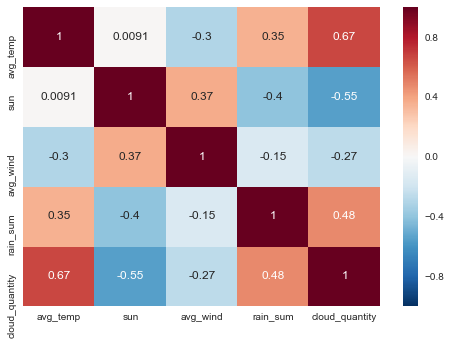

In [28]:
sns.heatmap(correlation_matrix, annot=True, xticklabels=names,yticklabels=names)

In [29]:
w_data = w_data.drop(['avg_cloud_quantity'],axis=1)

In [30]:
w_data['year'] = w_data['year'].str.split('/', expand=True)

In [31]:
var_temp = w_data.groupby('year')['avg_temp'].agg(['std'])
var_temp.head()

,std
year,
2001,7.786974
2002,7.339118
2003,7.139752
2004,7.423591
2005,7.816004


In [32]:
sum_all = w_data.groupby('year')['avg_temp','rain_sum','sun','avg_wind'].agg(['sum'])
sum_all.head()

,avg_temp,rain_sum,sun,avg_wind
,sum,sum,sum,sum
year,,,,
2001,190.4,1630.5,2063.6,41.8
2002,193.7,1638.0,2073.9,44.0
2003,187.0,2132.5,1794.3,43.2
2004,202.4,1932.0,2247.9,44.9
2005,189.5,1411.0,2045.1,40.5


In [33]:
#使えばよかった。。。
sum_all.reset_index()

,year,avg_temp,rain_sum,sun,avg_wind
,,sum,sum,sum,sum
0,2001,190.4,1630.5,2063.6,41.8
1,2002,193.7,1638.0,2073.9,44.0
2,2003,187.0,2132.5,1794.3,43.2
3,2004,202.4,1932.0,2247.9,44.9
4,2005,189.5,1411.0,2045.1,40.5
5,2006,191.5,1856.0,1667.4,40.1
6,2007,198.3,1464.5,2046.0,40.6
7,2008,193.2,1919.0,1957.4,38.4
8,2009,195.4,1894.0,1854.1,40.2


In [34]:
cd_df = pd.concat([var_temp,sum_all], axis=1)
cd_df.head()

,std,"(avg_temp, sum)","(rain_sum, sum)","(sun, sum)","(avg_wind, sum)"
year,,,,,
2001,7.786974,190.4,1630.5,2063.6,41.8
2002,7.339118,193.7,1638.0,2073.9,44.0
2003,7.139752,187.0,2132.5,1794.3,43.2
2004,7.423591,202.4,1932.0,2247.9,44.9
2005,7.816004,189.5,1411.0,2045.1,40.5


In [74]:
cd_value = cd_df.values
cd_pd = pd.DataFrame(cd_value)
cd_pd.head()

,0,1,2,3,4
0,7.786974,190.4,1630.5,2063.6,41.8
1,7.339118,193.7,1638.0,2073.9,44.0
2,7.139752,187.0,2132.5,1794.3,43.2
3,7.423591,202.4,1932.0,2247.9,44.9
4,7.816004,189.5,1411.0,2045.1,40.5


In [75]:
cd_pd.columns = ['var_temp','sum_temp','sum_sun','sum_wind','sum_rain']
cd_pd.head()

,var_temp,sum_temp,sum_sun,sum_wind,sum_rain
0,7.786974,190.4,1630.5,2063.6,41.8
1,7.339118,193.7,1638.0,2073.9,44.0
2,7.139752,187.0,2132.5,1794.3,43.2
3,7.423591,202.4,1932.0,2247.9,44.9
4,7.816004,189.5,1411.0,2045.1,40.5


In [76]:
econ = pd.read_csv('econ2.csv',delimiter=',')

In [78]:
yt_data = pd.concat([econ,cd_pd], axis=1)
yt_data

,year,money,var_temp,sum_temp,sum_sun,sum_wind,sum_rain
0,2001.0,35.7,7.786974,190.4,1630.5,2063.6,41.8
1,2002.0,37.9,7.339118,193.7,1638.0,2073.9,44.0
2,2003.0,38.0,7.139752,187.0,2132.5,1794.3,43.2
3,2004.0,36.3,7.423591,202.4,1932.0,2247.9,44.9
4,2005.0,35.0,7.816004,189.5,1411.0,2045.1,40.5
5,2006.0,33.4,7.425075,191.5,1856.0,1667.4,40.1
6,2007.0,36.0,7.130743,198.3,1464.5,2046.0,40.6
7,2008.0,37.8,7.465679,193.2,1919.0,1957.4,38.4
8,2009.0,39.2,6.962867,195.4,1894.0,1854.1,40.2
9,2010.0,37.2,7.899880,198.5,1855.5,2094.0,41.2


In [79]:
yt_data = yt_data.drop([14,15],axis=0)

In [80]:
yt_data['year'] = yt_data['year'].astype(int)
yt_data

,year,money,var_temp,sum_temp,sum_sun,sum_wind,sum_rain
0,2001,35.7,7.786974,190.4,1630.5,2063.6,41.8
1,2002,37.9,7.339118,193.7,1638.0,2073.9,44.0
2,2003,38.0,7.139752,187.0,2132.5,1794.3,43.2
3,2004,36.3,7.423591,202.4,1932.0,2247.9,44.9
4,2005,35.0,7.816004,189.5,1411.0,2045.1,40.5
5,2006,33.4,7.425075,191.5,1856.0,1667.4,40.1
6,2007,36.0,7.130743,198.3,1464.5,2046.0,40.6
7,2008,37.8,7.465679,193.2,1919.0,1957.4,38.4
8,2009,39.2,6.962867,195.4,1894.0,1854.1,40.2
9,2010,37.2,7.899880,198.5,1855.5,2094.0,41.2


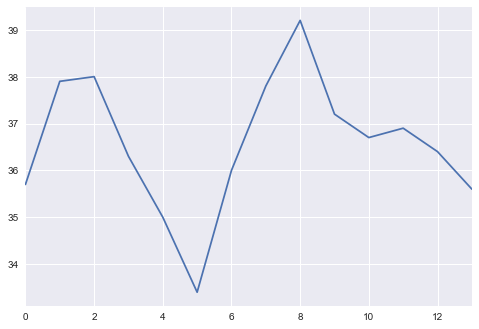

In [110]:
yt_data['money'].plot()

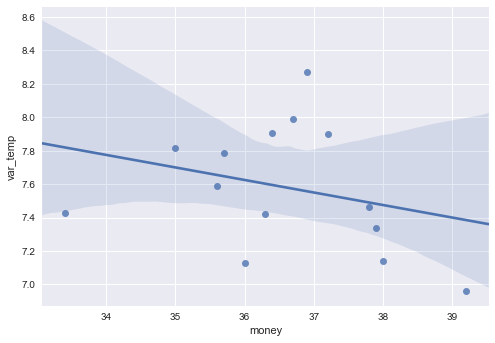

In [81]:
sns.regplot(x=yt_data["money"], y=yt_data["var_temp"])

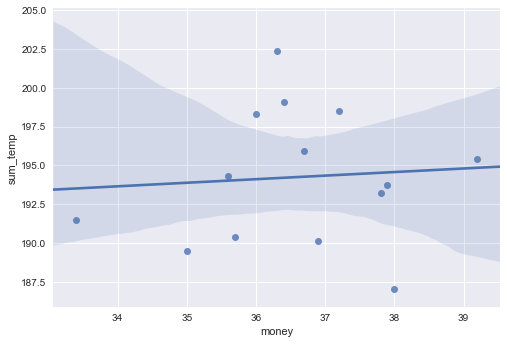

In [82]:
sns.regplot(x=yt_data["money"], y=yt_data["sum_temp"])

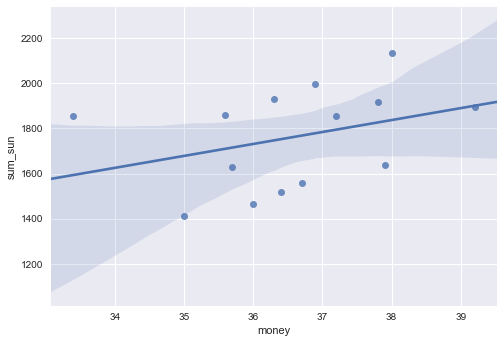

In [83]:
sns.regplot(x=yt_data["money"], y=yt_data["sum_sun"])

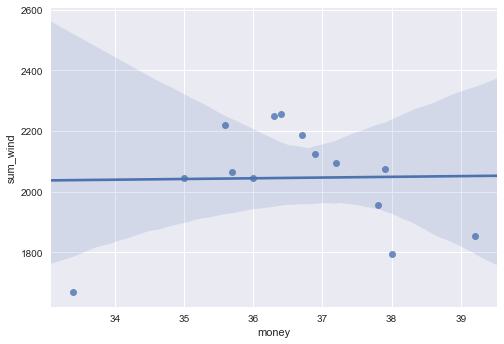

In [84]:
sns.regplot(x=yt_data["money"], y=yt_data["sum_wind"])

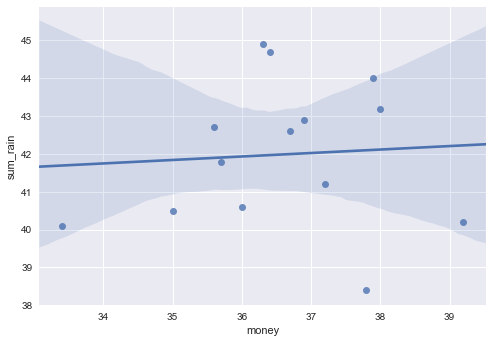

In [85]:
sns.regplot(x=yt_data["money"], y=yt_data["sum_rain"])

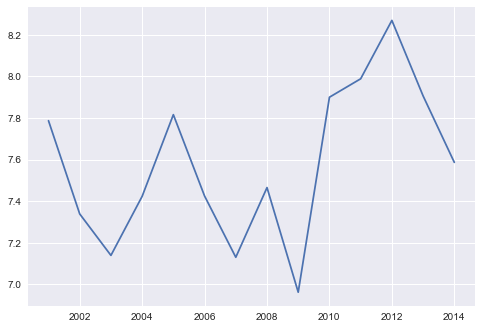

In [86]:
plt.plot( 'year','var_temp', data=yt_data)
plt.show()

In [87]:
yy_data = yt_data.set_index(['year'])

In [88]:
yy_data = np.log(yy_data.loc[:,['money','var_temp','sum_temp','sum_sun','sum_wind','sum_rain']])

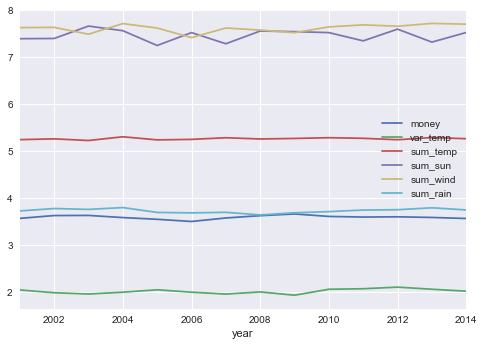

In [89]:
yy_data.plot()

In [90]:
#差分だお
yy_diff = yy_data.diff()

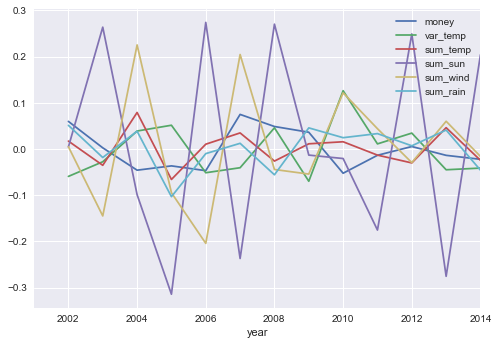

In [91]:
yy_diff.plot()

In [93]:
yy_moving_avg = yy_data.rolling(window=3).mean()

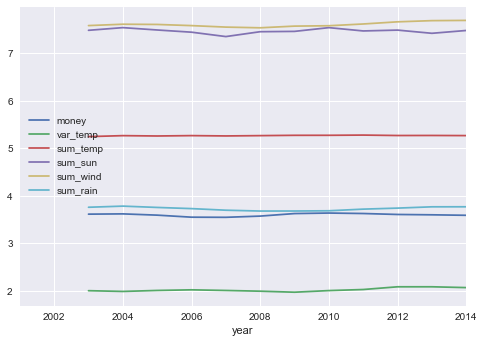

In [94]:
yy_moving_avg.plot()

In [102]:
#単位根検定
print (st.adfuller(yt_data['money'].values.ravel()))
print (st.adfuller(yt_data['var_temp'].values.ravel()))
print (st.adfuller(yt_data['sum_temp'].values.ravel()))
print (st.adfuller(yt_data['sum_sun'].values.ravel()))
print (st.adfuller(yt_data['sum_wind'].values.ravel()))
print (st.adfuller(yt_data['sum_rain'].values.ravel()))

(-1.2257848416414092, 0.66240655131701698, 4, 9, {'1%': -4.4731350480109739, '5%': -3.2898806035665298, '10%': -2.7723823456790124}, -328.58976670430286)
(-0.87049320860232349, 0.7975340891607402, 4, 9, {'1%': -4.4731350480109739, '5%': -3.2898806035665298, '10%': -2.7723823456790124}, -328.57627141945704)
(-0.0, 0.95853208606005602, 8, 5, {'1%': -6.0451139999999999, '5%': -3.9292800000000003, '10%': -2.9868100000000002}, -310.12917945736433)
(-3.7543904069527896, 0.0034099922614910343, 4, 9, {'1%': -4.4731350480109739, '5%': -3.2898806035665298, '10%': -2.7723823456790124}, -270.65463287786781)
(-0.0, 0.95853208606005602, 6, 7, {'1%': -4.9386902332361515, '5%': -3.4775828571428571, '10%': -2.8438679591836733}, -280.73326151433639)
(0.0, 0.95853208606005602, 8, 5, {'1%': -6.0451139999999999, '5%': -3.9292800000000003, '10%': -2.9868100000000002}, -329.68862103848073)


/Users/Taishi/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1148: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
